In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/ lol'
FOLDERNAME = 'trash-tech'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%load_ext autoreload
%autoreload 2

Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/$FOLDERNAME/data/
!bash collect_trashnet.sh
%cd /content/drive/My\ Drive/$FOLDERNAME

/content/drive/My Drive/cs231n_project/data
/content/drive/My Drive/cs231n_project


In [59]:
from data.pipeline import generate_split

# takes PIL image files
# converts them into ndarrays
# then applies train/val/test split
split = [0.8, 0.1, 0.1]
seed = 42

dataset = generate_split("data/dataset-resized", split, seed)

print(f'Train Image Data: {len(dataset["train"])}')
print(f'Val Image Data: {len(dataset["val"])}')
print(f'Test Image Data: {len(dataset["test"])}')

def get_label(i):
  return ["cardboard", "glass", "metal", "paper", "plastic", "trash"][i]

Train Image Data: 2024
Val Image Data: 252
Test Image Data: 251


In [53]:
from data.pipeline import SiftExtractor

# initialize extractor on train set
# use same extractor on test set
sift_extractor = SiftExtractor(dataset["train"])

X_train, y = sift_extractor.features, sift_extractor.labels
assert X_train.shape[0] == y.shape[0], "shapes don't match :("

Processed 100 Images
Processed 200 Images
Processed 300 Images
Processed 400 Images
Processed 500 Images
Processed 600 Images
Processed 700 Images
Processed 800 Images
Processed 900 Images
Processed 1000 Images
Processed 1100 Images
Processed 1200 Images
Processed 1300 Images
Processed 1400 Images
Processed 1500 Images
Processed 1600 Images
Processed 1700 Images
Processed 1800 Images
Processed 1900 Images
Processed 2000 Images
Extracting Vocabulary...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Generating Features from 100 Images
Generating Features from 200 Images
Generating Features from 300 Images
Generating Features from 400 Images
Generating Features from 500 Images
Generating Features from 600 Images
Generating Features from 700 Images
Generating Features from 800 Images
Generating Features from 900 Images
Generating Features from 1000 Images
Generating Features from 1100 Images
Generating Features from 1200 Images
Generating Features from 1300 Images
Generating Features from 1400 Images
Generating Features from 1500 Images
Generating Features from 1600 Images
Generating Features from 1700 Images
Generating Features from 1800 Images
Generating Features from 1900 Images
Generating Features from 2000 Images
(2020, 200) (2020,)


In [54]:
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score

lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y)

X_test, y_true = sift_extractor.extract_sift(dataset["test"])
y_pred = lin_clf.predict(X_test)

0.476


In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
print(f"Precision: {precision_score(y_true, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_true, y_pred, average='macro')}")

(array([0., 1., 2., 3., 4.]), array([ 38,  31,  23, 104,  54]))
Accuracy: 0.476
Precision: 0.41593759154842797
Recall: 0.40516404585493054


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


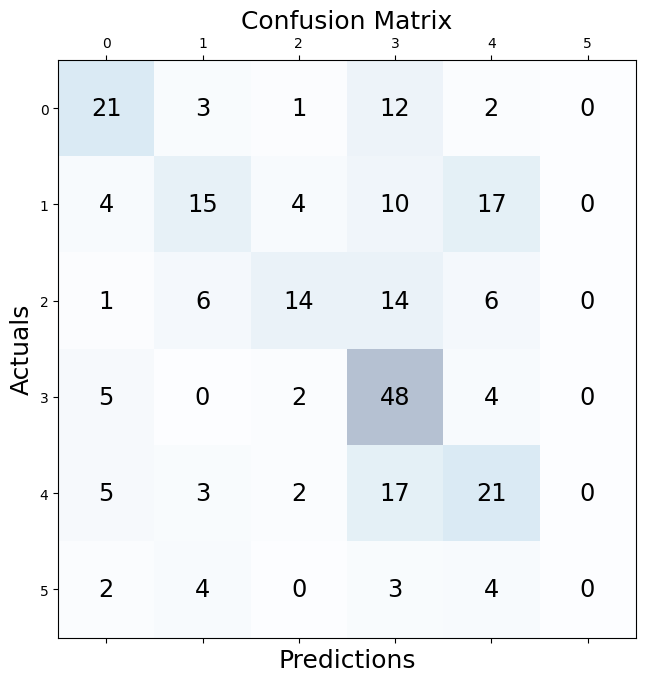

In [70]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

cfm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cfm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cfm.shape[0]):
  for j in range(cfm.shape[1]):
    ax.text(x=j, y=i, s=cfm[i, j], va="center", ha="center", size="xx-large")

plt.xlabel("Predictions", fontsize=18)
plt.ylabel("Actuals", fontsize=18)
plt.title("Confusion Matrix", fontsize=18)
plt.show()